In [1]:
# Obtaining the MNIST dataset
# download from http://yann.lecun.com/exdb/mnist/

import os
import struct
import numpy as np
def load_mnist(path, kind='train'):
    """Load MNIST data from 'path'
        Returns two arrays:
        1. n x m dimensional NumPy array (images) - unroll 28 x 28 pixel into 1d row vector samples
        2. target variable class labels (integers 0-9) (labels)
    """
    labels_path = os.path.join(path, '%s-labels-idx1-ubyte'
                              % kind)
    images_path = os.path.join(path,
                              '%s-images-idx3-ubyte'
                              % kind)
    
    with open(labels_path, 'rb') as lbpath:
        magic, n = struct.unpack('>II', lbpath.read(8)) # > means big endian, I is unsigned integer, 8 bytes
        labels = np.fromfile(lbpath, dtype=np.uint8)
    
    with open(images_path, 'rb') as imgpath:
        magic, num, rows, cols = struct.unpack(">IIII",
                                              imgpath.read(16))
        images = np.fromfile(imgpath,
                            dtype=np.uint8).reshape(len(labels),784)
    
    return images, labels

In [2]:
# Training set
X_train, y_train = load_mnist('mnist', kind='train')
print('Rows: %d, columns: %d' % (X_train.shape[0], X_train.shape[1]))

Rows: 60000, columns: 784


In [3]:
# Test set
X_test, y_test = load_mnist('mnist', kind='t10k')
print('Rows: %d, columns: %d' % (X_test.shape[0], X_test.shape[1]))

Rows: 10000, columns: 784


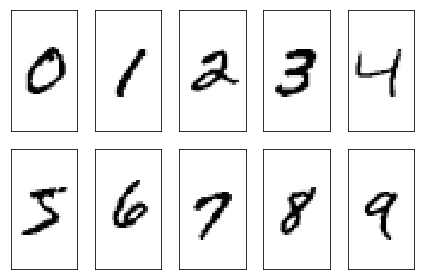

In [4]:
# Visualize MNIST
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True,)
ax = ax.flatten()
for i in range(10):
    img = X_train[y_train == i][0].reshape(28, 28) # change to image format, take first example from training set
    ax[i].imshow(img, cmap='Greys', interpolation='nearest') #imshow display image on axis, interpolate to fill blanks
ax[0].set_xticks([]) # no ticks
ax[0].set_yticks([]) # no ticks
plt.tight_layout()
plt.show()

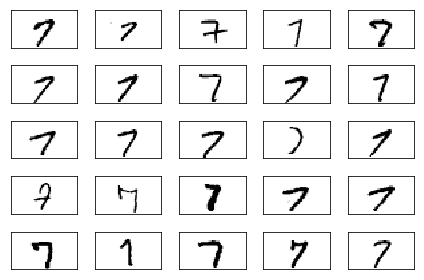

In [5]:
# plot multiple examples of same digit
fig, ax = plt.subplots(nrows=5,
                     ncols=5,
                     sharex=True,
                     sharey=True,)
ax = ax.flatten()
for i in range(25):
    img = X_train[y_train == 7][i].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')
ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

In [6]:
from neuralnet import NeuralNetMLP

# initialize 784-50-10 MLP:
# neural network with 784 input units (n_features), 50 hidden units(n_hidden) and 10 output units(n_output)
nn = NeuralNetMLP(n_output=10,
                 n_features=X_train.shape[1],
                  n_hidden=50,
                  l2=0.1,
                  l1=0.0,
                  epochs=1000,
                  eta=0.001,
                  alpha=0.001,
                  decrease_const=0.00001,
                  shuffle=True,
                  minibatches=50,
                  random_state=1)


In [7]:
# train MLP using 60,000 samples from already shuffled MNIST training dataset
nn.fit(X_train, y_train, print_progress=True)

Epoch: 1000/1000

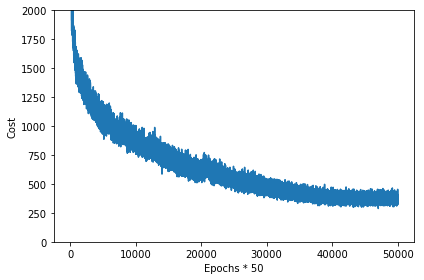

In [10]:
# plot every 50th step
plt.plot(range(len(nn.cost_)), nn.cost_)
plt.ylim([0, 2000])
plt.ylabel('Cost')
plt.xlabel('Epochs * 50')
plt.tight_layout()
plt.show()

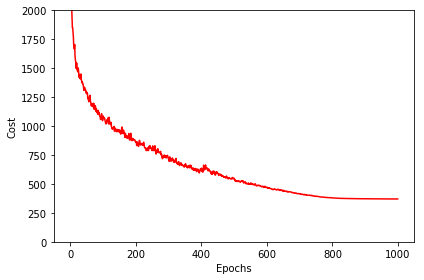

In [13]:
# plot smoother version by averaging over mini-batch intervals
batches = np.array_split(range(len(nn.cost_)), 1000)
cost_ary = np.array(nn.cost_)
cost_avgs = [np.mean(cost_ary[i]) for i in batches]
plt.plot(range(len(cost_avgs)),
        cost_avgs,
        color='red')
plt.ylim([0, 2000])
plt.ylabel('Cost')
plt.xlabel('Epochs')
plt.tight_layout()
plt.show()
# converged after 800th epoch

In [14]:
# prediction accuracy (train):
y_train_pred = nn.predict(X_train)
acc = np.sum(y_train == y_train_pred, axis=0) / X_train.shape[0]
print('Training accuracy: %.2f%%' % (acc * 100))

Training accuracy: 97.49%


In [15]:
# prediction accuracy (test):
y_test_pred = nn.predict(X_test)
acc = np.sum(y_test == y_test_pred, axis=0) / X_test.shape[0]
print('Test accuracy: %.2f%%' % (acc * 100))

Test accuracy: 95.68%


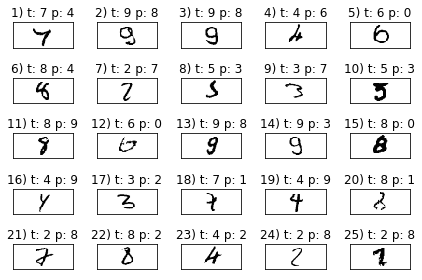

In [26]:
# Misclassified samples
miscl_img = X_test[y_test != y_test_pred][:25]
correct_lab = y_test[y_test != y_test_pred][:25]
miscl_lab = y_test_pred[y_test != y_test_pred][:25]

fig, ax = plt.subplots(nrows=5,
                      ncols=5,
                      sharex=True,
                      sharey=True,)
ax = ax.flatten()
for i in range(25):
    img = miscl_img[i].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')
    ax[i].set_title('%d) t: %d p: %d' %(i+1, correct_lab[i], miscl_lab[i]))
ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()